In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 관련 라이브러리 선언
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 학습 데이터 불러오기 및 전처리
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [19]:
train_images[0].dtype


dtype('float64')

In [4]:
# 은닉층 설계
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
# 출력층 설계
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          3

In [6]:
# 학습과정 설정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 학습 및 평가
model.fit(train_images, train_labels, epochs=1)
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.0448 - accuracy: 0.9866


[0.04478481039404869, 0.9865999817848206]

In [7]:
!ln -s /content/drive/MyDrive/ /mydrive


In [8]:
%cd /mydrive

/content/drive/MyDrive


In [9]:
!mkdir mnist

mkdir: cannot create directory ‘mnist’: File exists


In [10]:
# 결과 저장
model.save('mnist/mnist_model.h5')

In [11]:
loaded_model = load_model('mnist/mnist_model.h5')
#loaded_model.predict(test_images[0])

In [12]:
test_images[0].shape

(28, 28, 1)

In [13]:
x = test_images[0].reshape(1, 28, 28, 1)
y = loaded_model.predict(x)

In [14]:

np.argmax(y) 

7

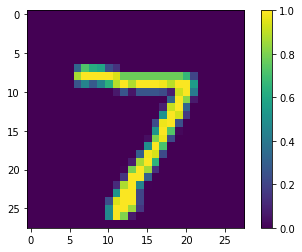

In [17]:
img = test_images[0].reshape(28, 28)

plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()